在安装后，我们用下列命令来导入OpenCV库

In [1]:
import cv2
print(cv2.__version__)

3.1.0


# 图像入门

## 读取图像

使用函数cv2.imread（）来读取图像。图像应该在工作目录中，或者应该给出图像的完整路径。

第二个参数是一个指定图像应该被读取的方式的标志。

cv2.IMREAD_COLOR：加载彩色图像。任何透明度的图像都将被忽略。它是默认标志。

cv2.IMREAD_GRAYSCALE：以灰度模式加载图像

cv2.IMREAD_UNCHANGED：加载图像，包括alpha通道

可以简单的用1，0，-1来表示这3种模式

In [4]:
img = cv2.imread('dog.jpg',1) # 以色彩模式加载图像

## 显示图像

使用函数cv2.imshow（）在窗口中显示图像。窗口自动适应图像尺寸。

第一个参数是一个字符串的窗口名称。第二个参数是我们的图像。您可以根据需要创建尽可能多的窗口，但使用不同的窗口名称。

In [6]:
cv2.imshow('dog',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.waitKey（）是键盘绑定功能。它的参数是以毫秒为单位的时间。该功能等待任何键盘事件指定的毫秒。如果在该时间按任何键，程序继续。如果0被传递，它将无限期地等待一个键。它也可以设置为检测特定的键按下，如按键a被按下等等，我们将在下面讨论。

cv2.destroyAllWindows（）关闭我们创建的所有窗口。如果要销毁任何特定的窗口，请使用函数cv2.destroyWindow（）来传递确切的窗口名称作为参数。

## 储存图像

使用函数cv2.imwrite（）保存图像。

第一个参数是文件名，第二个参数是要保存的图像。

In [7]:
cv2.imwrite('dog.png',img)

True

这将在工作目录中以PNG格式保存图像。

## 使用Matplotlib库

Matplotlib是Python的绘图库，为您提供了各种绘图方法。你会在接下来的文章中看到他们。在这里，您将学习如何使用Matplotlib显示图像。您可以使用Matplotlib缩放图像，保存等。

另外的一个好处是我们可以在notebook里显示图片

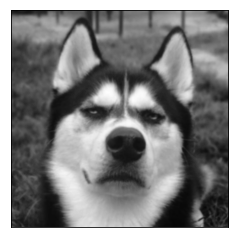

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline 

img = cv2.imread('dog.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

注意：OpenCV加载的彩色图像处于BGR模式。但是Matplotlib以RGB模式显示。因此，如果使用OpenCV读取图像，则Matplotlib中的彩色图像将无法正确显示。


# 视频入门

## 从相机捕获视频
通常我们必须用相机捕捉直播。 OpenCV为此提供了一个非常简单的界面。让我们从相机拍摄一个视频（我正在使用笔记本电脑的内置网络摄像头），将其转换为灰度视频并显示。

要捕获视频，您需要创建一个VideoCapture对象。其参数可以是设备索引或视频文件的名称。设备索引只是指定哪个相机的号码。通常一个相机将被连接（如我的情况）。所以我只是通过0（或-1）。您可以通过1选择第二台相机，依此类推。之后，您可以逐帧捕获。但最后，别忘了释放捕获。

In [14]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

cap.read（）返回一个bool（True / False）。如果frame正确读取，则为True。所以你可以通过检查这个返回值来检查视频的结尾。

有时候，cap可能没有初始化捕获。在这种情况下，此代码显示错误。您可以通过cap.isOpened（）方法检查是否已初始化。如果是True，OK。否则使用cap.open（）打开它。

您还可以使用cap.get（propId）方法访问此视频的某些功能，其中propId是从0到18的数字。每个数字表示视频的属性（如果适用于该视频），并且完整的详细信息可以在这里可以看到：属性标识符。这些值中的一些可以使用cap.set（propId，value）进行修改。价值是你想要的新价值。

例如，我可以通过cap.get（3）和cap.get（4）来检查框架的宽度和高度。默认情况下给我640x480。但是我想将其修改为320x240。只需使用ret = cap.set（3,320）和ret = cap.set（4,240）。

## 从文件读取视频

与Camera相同，只需用摄像机名称更改摄影机索引。同时显示帧时，请使用适当的时间为cv2.waitKey（）。如果它太少，视频将会非常快，如果它太高，视频将会慢（那就是如何以慢动作显示视频）。一般情况下25毫秒都可以。

In [ ]:
cap = cv2.VideoCapture('vtest.avi')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()